<a href="https://colab.research.google.com/github/manashpratim/Intel-image-Classification/blob/master/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import cv2
import pandas as pd

#Downloading the Datasets
!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562648562&Signature=ZavNM7K9K59BvuUwyOdR0ZpgcLCLi31tiO3jf%2B0Yj2wZhIbFhD0LAnjFwd1IpH5NCYoTm5IhKA84bGyIcgUDMhWPd%2FDtyKYt0K8kDthLOOmjqsEWdoTs6HRFNId%2FQ%2BX0M17avlRPddYBvaZtSEG9Ryi0jMtt0JsqgAbtiUgmiOjEdahqCJNFjPugyPGmkQ5qnush%2FRWqHXvCbdohpE3DbT%2Fq4m8Ex%2BwgLk64vokZZKE5AxEs6dWzoGs%2FoVOv4pLHfL8kGi8CQNFKsJcylg%2B%2FF2mcCU%2FrOVenuUg1ls1ZeXCnwr1j3iytGO4QRWYLxCgscexkkJ24Fl%2F0a636Tg3iLw%3D%3D"\
        -O "/tmp/train.zip"
         
!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562648575&Signature=kV%2B5fLzYP1YSksU4zR9QOUr%2F0vnI3XerVfQ1hxA7NB%2FwiyreQpy5UJYcN6ZqkL3SnohnJ3XEEZ62kXA9V65lGwBm95udJGiHtsMsTW%2BJIlwT7fY4cgKfU1HArkKMxjKvOCWxp0EbzmDzKZbFGE7zqABPLX0Wqkr0ebfemCsgaGDRvS1OwTTU4g9IsOau7q1LjtOb%2F6QQgGHn4DIdvEmqlAo0b0BmQFFkH5Hrac0HNBLzzfDhqSmoMHsQsbL9UTHIGRcOlbuJ7hOP8xZZX5fWML3YyFCfQLobJBLU6mRiRKvQgnQhecOsHy0iC%2FsSLDcsAf8OcScXbXfEAdSr61YFuQ%3D%3D"\
        -O "/tmp/test.zip"

!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/111880/269359/seg_pred.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1562648587&Signature=YUvrWgqF3mFuzZQ6aF6jFGhHH3vg6zuxk0eRz4pLSJxbeEkk%2FQXLZw92mARitrV2pcDxA%2B2FKyNK%2FBh%2BZftd3HF%2B3NYPOKw%2B7cvVC1bhNw2OE2mNHpWmtFL3Xd5%2BNuUAw1mDJqz1E8fLRTheKkssm%2F%2F36WrhQ2%2BAlrkfggHgH07OvYx2IF6D8qLUQ8OUJiy7ySfoGuMCBZR5pqesOYguyfcX7eTMRiVeqbnVL%2B6rI8NxbU2CETXLpTNiNZ%2BNuobYHGP0X%2FmatPtiVWsgN8quWunss5IC9amNFQFrybD1hmZB269hfXJQjxUMWjjzXzOHHJ6%2FjEt%2Fh%2FCuk6aLf2o7Ag%3D%3D"\
        -O "/tmp/pred.zip"

#Unzipping the train and test folders
import os
import zipfile

local_zip='/tmp/train.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/train')
zip_ref.close()


local_zip='/tmp/test.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

local_zip='/tmp/pred.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/pred')
zip_ref.close()



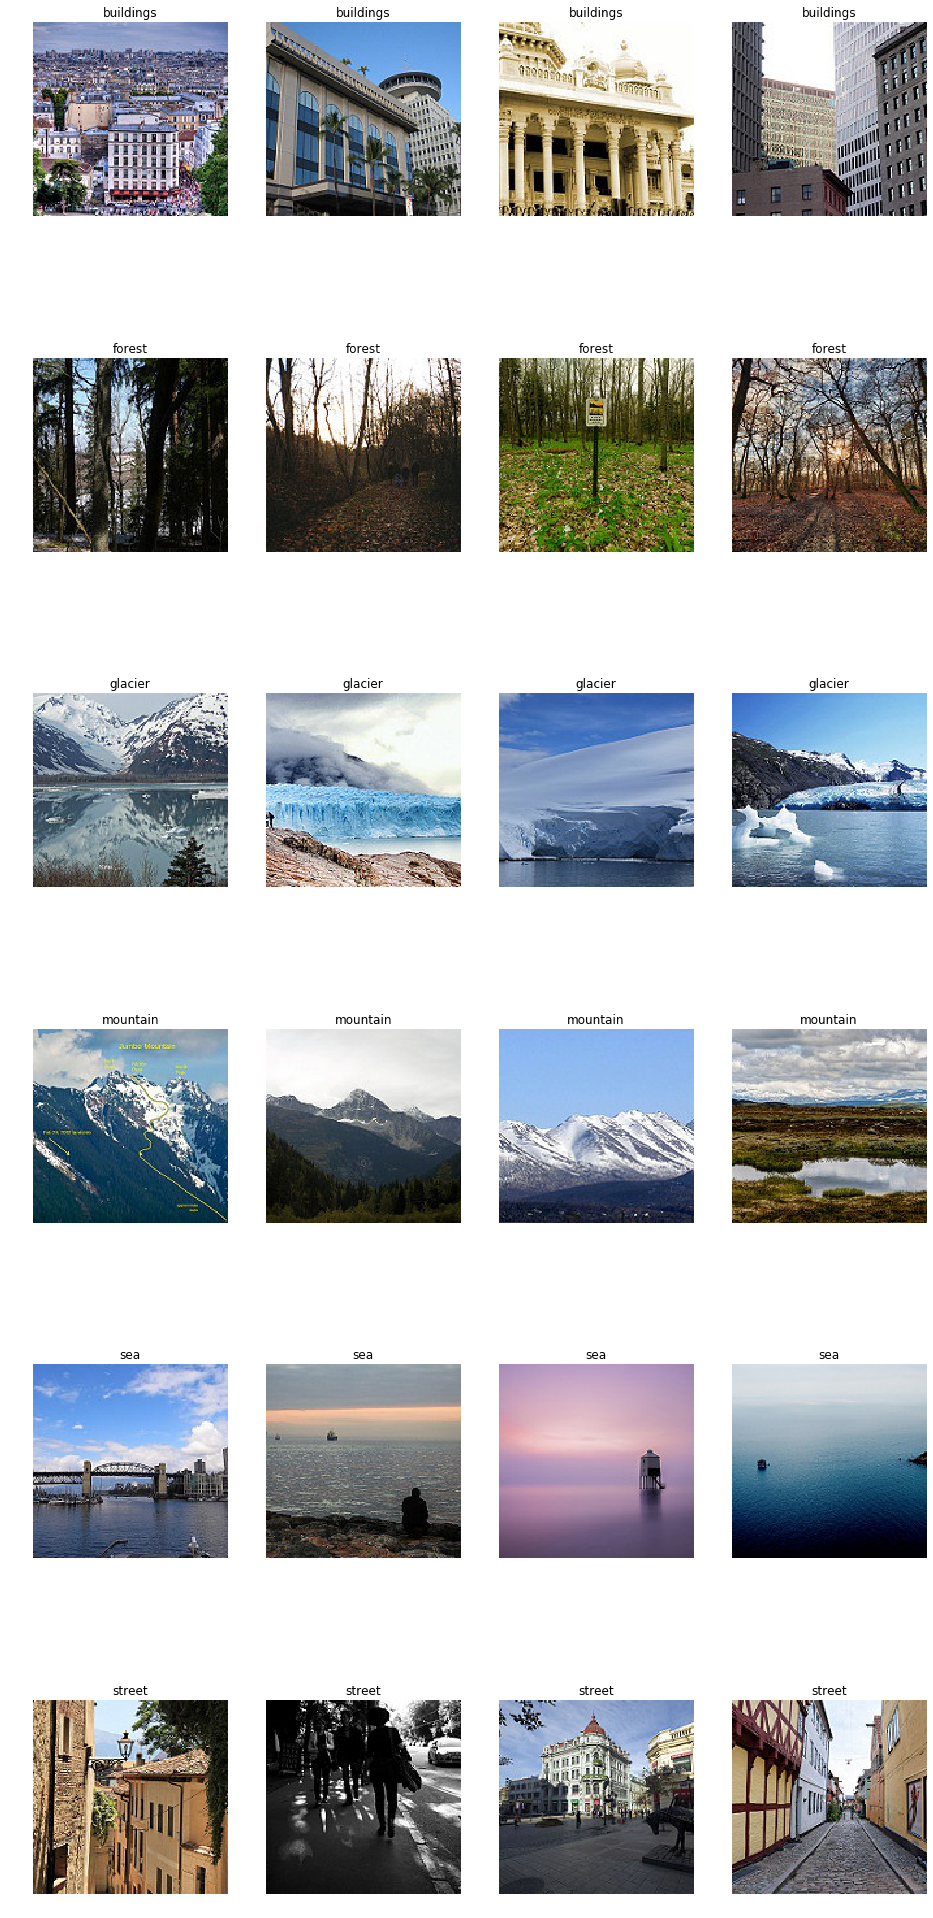

In [ ]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=6
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*6)

pic_index+=4

next_a_pix = [os.path.join('/tmp/train/seg_train/'+classes[0]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[0]+'/')[pic_index-4:pic_index]]
next_b_pix = [os.path.join('/tmp/train/seg_train/'+classes[1]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[1]+'/')[pic_index-4:pic_index]]
next_c_pix = [os.path.join('/tmp/train/seg_train/'+classes[2]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[2]+'/')[pic_index-4:pic_index]]
next_d_pix = [os.path.join('/tmp/train/seg_train/'+classes[3]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[3]+'/')[pic_index-4:pic_index]]
next_e_pix = [os.path.join('/tmp/train/seg_train/'+classes[4]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[4]+'/')[pic_index-4:pic_index]]
next_f_pix = [os.path.join('/tmp/train/seg_train/'+classes[5]+'/' ,fname) for fname in os.listdir('/tmp/train/seg_train/'+classes[5]+'/')[pic_index-4:pic_index]]

j=0
for i, img_path in enumerate(next_a_pix+next_b_pix+next_c_pix+next_d_pix+next_e_pix+next_f_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])

  
plt.show()

In [ ]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)

"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.01,
      zoom_range=[0.1, 1.5],
      horizontal_flip=True,
      fill_mode='nearest',
      zca_whitening=True,
      brightness_range=[0.1, 2]
)"""


train_generator=train_datagen.flow_from_directory(
      '/tmp/train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)

validation_generator=train_datagen.flow_from_directory(
      '/tmp/train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    '/tmp/test/seg_test/', 
    target_size=(150,150),
    batch_size=32,
    class_mode='sparse',
    seed=2209
) 

test1_datagen = ImageDataGenerator(rescale = 1./255.)
test1_generator = test1_datagen.flow_from_directory(
    '/tmp/test/seg_test/', 
    target_size=(150,150),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=2209
) 

In [ ]:
SEED = 2209
import os
import random as rn
import numpy as np
from tensorflow import set_random_seed

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
set_random_seed(SEED)
rn.seed(SEED)

# **Convolutional Neural Network**

In [ ]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

Using TensorFlow backend.
W0707 00:34:34.487998 140175283390336 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  steps_per_epoch=int(12632/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(1402/64),
  callbacks=[reduce],
  verbose=1
)

Epoch 1/50
219/219 [==============================] - 120s 546ms/step - loss: 1.6726 - acc: 0.3554 - val_loss: 4.9593 - val_acc: 0.1801
Epoch 2/50
219/219 [==============================] - 102s 464ms/step - loss: 1.1918 - acc: 0.5174 - val_loss: 1.4867 - val_acc: 0.4926
Epoch 3/50
219/219 [==============================] - 102s 468ms/step - loss: 0.9914 - acc: 0.6368 - val_loss: 1.0966 - val_acc: 0.6302
Epoch 4/50
219/219 [==============================] - 102s 465ms/step - loss: 0.8863 - acc: 0.6964 - val_loss: 1.0696 - val_acc: 0.6205
Epoch 5/50
219/219 [==============================] - 102s 467ms/step - loss: 0.8107 - acc: 0.7294 - val_loss: 1.0139 - val_acc: 0.6607
Epoch 6/50
219/219 [==============================] - 102s 466ms/step - loss: 0.7505 - acc: 0.7555 - val_loss: 0.7182 - val_acc: 0.7530
Epoch 7/50
219/219 [==============================] - 102s 466ms/step - loss: 0.7064 - acc: 0.7756 - val_loss: 1.3511 - val_acc: 0.6243
Epoch 8/50
219/219 [============================

In [ ]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

2/2 - 0s - loss: 0.3731 - acc: 0.9062
Accuracy of the model on the test set:  0.90625


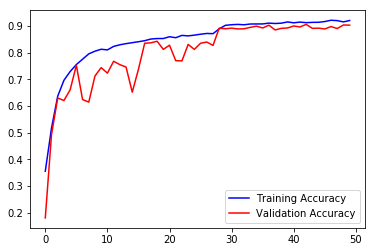

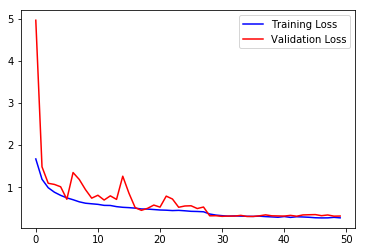

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# **ResNet50**

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.resnet50 import ResNet50
import keras


base_model2=ResNet50(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model2.trainable = False

x = Dense(512, activation='relu')(base_model2.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model2 = Model(base_model2.input, x) 
transfer_model2.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

W0707 00:37:17.732120 140175283390336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 00:37:17.733936 140175283390336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 00:37:17.747377 140175283390336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0707 00:37:17.773104 140175283390336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0707 00:37:17.773892

94658560/94653016 [==============================] - 1s 0us/step


W0707 00:37:30.018085 140175283390336 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0707 00:37:30.062213 140175283390336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history3 = transfer_model2.fit_generator(
            train_generator,
            steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

W0707 00:37:39.444636 140175283390336 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
197/197 [==============================] - 102s 518ms/step - loss: 2.1604 - acc: 0.2002 - val_loss: 1.6619 - val_acc: 0.3214
Epoch 2/50
197/197 [==============================] - 89s 454ms/step - loss: 1.8697 - acc: 0.2809 - val_loss: 1.4205 - val_acc: 0.4649
Epoch 3/50
197/197 [==============================] - 88s 446ms/step - loss: 1.6412 - acc: 0.3610 - val_loss: 1.2430 - val_acc: 0.6001
Epoch 4/50
197/197 [==============================] - 87s 443ms/step - loss: 1.4663 - acc: 0.4368 - val_loss: 1.1014 - val_acc: 0.6629
Epoch 5/50
197/197 [==============================] - 87s 443ms/step - loss: 1.3294 - acc: 0.4957 - val_loss: 0.9709 - val_acc: 0.7190
Epoch 6/50
197/197 [==============================] - 87s 442ms/step - loss: 1.2071 - acc: 0.5482 - val_loss: 0.8798 - val_acc: 0.7541
Epoch 7/50
197/197 [==============================] - 87s 443ms/step - loss: 1.1108 - acc: 0.5895 - val_loss: 0.8349 - val_acc: 0.7653
Epoch 8/50
197/197 [==============================] - 

In [ ]:
accuracy2=transfer_model2.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy2[1])

Accuracy of the model on the test set:  0.953125


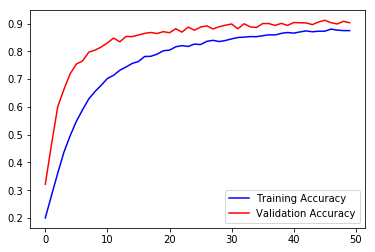

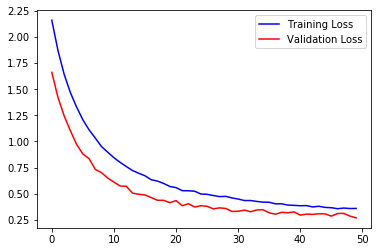

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history3.history['acc']
val_acc=history3.history['val_acc']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()